# <center>Text Mining</center>

___

Text data falls into the category of unstructured data and requires some preparation before it can be used for modeling. Text preperation is different from structed data pre-processing.

Today we will go through the process of preparing text data and building a predictive model on it.

# Text Mining Lab Activity - Topic Modeling

## Agenda


- Introduction to Text mining
    - Regular Expression for special character removal
    - Removal of accented characters and expanding contractions
    - Tokenisation
    - Stop Word Removal
    - Stemming and Lemmatization
- TF-IDF
- Clustering
- SVD using scikitlearn

## Topic Modeling
Topic Modeling automatically discover the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.


## Comparison Between Text Classification and Topic Modeling
Text classification is a supervised machine learning problem, where a text document or article classified into a pre-defined set of classes. Topic modeling is the process of discovering groups of co-occurring words in text documents. These group co-occurring related words makes "topics". It is a form of unsupervised learning, so the set of possible topics are unknown. Topic modeling can be used to solve the text classification problem. Topic modeling will identify the topics presents in a document" while text classification classifies the text into a single class.


## Use Cases of Topic Modeling
Simple applications in which this technique is used are documented clustering in text analysis, recommender systems, and information retrieval. More detailed use-cases of topic modeling are:

**Resume Summarization:** It can help recruiters to evaluate resumes by a quick glance. They can reduce effort in filtering pile of resume.<br><br>

**Search Engine Optimization:** Online articles, blogs, and documents can be tagged easily by identifying the topics and associated keywords, which can improve optimize search results.<br><br>

**Recommender System Optimization:** Recommender systems act as an information filter and advisor according to the user profile and previous history. It can help us to discover unvisited relevant content based on past visits.<br><br>
    
**Improving Customer Support:** Discovering relevant topics and associated keywords in customer complaints and feedback for examples product and service specifications, department, and branch details. Such information help company to directly rotated the complaint in respective department.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

#!pip install wordcloud
from wordcloud import WordCloud

import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Extracted_Blogs.csv", sep= ',')
data.head()

,Author,title,link,text
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,Here are the most useful websites on the Inte...
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,The Learn to Code movement has picked up mome...
2,Amit Agarwal,Voice Dictation,https://dictation.io/,Use the magic of speech recognition to write ...
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,Whether you are a new Mac user or seasoned ve...
4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,It is now easier than ever before to sell you...


## Text Preprocessing Steps 

In [4]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy

print(type(data['text']))

original_data = copy.deepcopy(data)

print(data.keys())

print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['Author', 'title', 'link', 'text'], dtype='object')
Index(['Author', 'title', 'link', 'text'], dtype='object')


### Basic cleaning of text

### LowerCase all text

In [5]:
data['text'] = [text.strip().lower() for text in data['text']]
data['text'][:10]

0    here are the most useful websites on the inter...
1    the learn to code movement has picked up momen...
2    use the magic of speech recognition to write e...
3    whether you are a new mac user or seasoned vet...
4    it is now easier than ever before to sell your...
5    mail merge for gmail lets you easily send pers...
6    wireless networking (wi-fi) has made it so eas...
7    by category\n\n by date\n\n  my first book, my...
8    by category\n\n by date\n\n  deserves to be ca...
9    rave out is about books, films and music that ...
Name: text, dtype: object

## Defining the functions to perform basic steps like 

- **expanding contractions**
 
- **remove accented characters**

- **scrub words**

In [6]:
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. don’t just download the latest app, help redesign it. don’t just play on your phone, program it. — obama. there’s no reason why shouldn’t know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfort of

In [7]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

## Invoking the expand_contractions functions

In [9]:
data['text'] = [expand_contractions(re.sub('’', "'", text)) for text in data['text']]
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. do not just download the latest app, help redesign it. do not just play on your phone, program it. — obama. there is no reason why should not know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfor

In [10]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [11]:
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, español, français, italiano, português, हिन्दी, தமிழ், اُردُو, বাংলা, ગુજરાતી, ಕನ್ನಡ, and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia

## Invoking the remove_accented_chars functions

In [12]:
data['text'] = [remove_accented_chars(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, espanol, francais, italiano, portugues, , , , , , , and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia, bahasa melayu, catala, cestina, 

In [13]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

## Invoking the above defined functions

In [14]:
data['text'] = [scrub_words(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome dictation accurately transcribes your speech to text in real time you can add paragraphs punctuation marks and even smileys using voice commands dictation can recognize and transcribe popular languages including english espanol francais italiano portugues and more see full list of you can add new paragraphs punctuation marks smileys and other special characters using simple voice commands for instance say new line to move the cursor to the next list or say smiling face to insert smiley see list of supported dictation uses google speech recognition to transcribe your spoken words into text it stores the converted text in your browser locally and no data is uploaded anywhere amit labnol org google chromewindows mac linuxinternet connection here s a list of languages supported by speech recognition afrikaans bahasa indonesia bahasa melayu catala cestina dansk deutsch english espanol euskara filipino franca

#### Spell Correction

### Checking the integrity of the data after initial preprocessing steps

In [15]:
print("Data Type: ",type(original_data['text']))
print("Data Type: ",type(data['text']))

print("Length of data: ",len(original_data['text']))
print("Length of data: ",len(data['text']))

print("Original data: \n",original_data['text'][0])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['text'][0]) 

Data Type:  <class 'pandas.core.series.Series'>
Data Type:  <class 'pandas.core.series.Series'>
Length of data:  685
Length of data:  685
Original data: 
  Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Go

In [16]:
print("Original data: \n",original_data['text'][1])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['text'][1])

Original data: 
  The Learn to Code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. If you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. Don’t just download the latest app, help redesign it. Don’t just play on your phone, program it. — Obama. There’s no reason why shouldn’t know the basics of coding. You can automate tasks, you can program your Excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. You may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. Gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based courses that will help you learn programming at your own pace in the co

#### Adding new column "word_count" which specifies the number of tokens in each document

In [17]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]
pd.DataFrame(data['word_count']).describe()

,word_count
count,685.000000
mean,5053.792701
std,9539.212316
min,1.000000
25%,14.000000
50%,214.000000
75%,4449.000000
max,50571.000000


In [18]:
print(f"The total words in the 4th blog is {data['word_count'][4]}")
print(f"The 390th blog is {data['text'][4]}")

The total words in the 4th blog is 896
The 390th blog is it is now easier than ever before to sell your music to a worldwide audience i have been a musician since childhood and while education travel and then working for a living got in the way of my dream of becoming a guitar hero i have never given up hope indeed i have spent the last couple of years writing and recording an eclectic mix of songs the next obvious step was to find some way to get them heard which is where the advent of social media came into its own while myspace is something of a musical backwater these days despite justin timberlake s intervention it is still a place to post one s songs and updates for a musically oriented audience much stronger and with a better sense of community though is i began uploading instrumentals and songs to soundcloud several years ago but then opted for a paid account to get more comprehensive statistics as well as pretty much unlimited space for audio files followers on soundcloud are 

#### Converting the dictionary to Dataframe 

Converting dictionary to dataframe as pandas provide better and readable subsetting options

In [19]:
data.keys()

Index(['Author', 'title', 'link', 'text', 'word_count'], dtype='object')

In [20]:
blogs_df = pd.DataFrame(data)
print("Shape: ",blogs_df.shape)
blogs_df.head(5)

Shape:  (685, 5)


,Author,title,link,text,word_count
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483
2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260
4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896


#### Removing all the blogs with words_count value less than first quartile (25%) of words_count attribute

In [21]:
## Getting the first quartile value
q1 = np.percentile(blogs_df.word_count,25)
print(f"The first quartile value of words_count attribute is {q1}")

The first quartile value of words_count attribute is 14.0


In [22]:
blogs_df = blogs_df[blogs_df['word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

The shape of trimmed blogs dataframe is (495, 5)


#### Converting dataframe back to dictionary

In [23]:
# For sake of time we are processing first 20 records
data = blogs_df.iloc[0:20,:].reset_index().to_dict(orient='list')

print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count'])


In [52]:
print(data['text'][7])

by category by date my first book my friend sancho was published in may and went on to become the biggest selling debut novel released that year in india it is a contemporary love story set in mumbai and had earlier for the man asian literary prize to learn more about the book if you are interested do join for my friend sancho for more about my publisher hachette india my posts on india uncut about my friend sancho can be found this is the th installment of the rationalist my column for the times of india back in the last decade i was a cricket journalist for a few years then around years ago i quit i was jaded as hell every game seemed like deja vu nothing new just another round on the treadmill although i would remember her fondly i thought me and cricket were done and then i fell in love again cricket has changed in the last few years in glorious ways there have been new ways of thinking about the game there have been new ways of playing the game every season new kinds of drama form

In [24]:
type(data['text'])

list

## Stopwords, stemming, and tokenizing

In [25]:
## load spacy's English stopwords as variable called 'stopwords'
import spacy
# Load the language model
nlp = spacy.load('en_core_web_sm')
#from spacy.lang.en.stop_words import STOP_WORDS
stopwords = spacy.lang.en.stop_words.STOP_WORDS

print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])


Number of stop words: 326
First ten stop words: ['‘d', 'they', 'perhaps', 'please', 'never', 'via', 'another', 'by', 'must', 'why']


In [26]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['apps','script','g','suite','apis', 'posted','amit','varma','essays','op-eds', 'th']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [27]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [28]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [30]:
data

{'index': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'Author': ['Amit Agarwal',
  'Amit Agarwal',
  'Amit Agarwal',
  'Amit Agarwal',
  'Amit Agarwal',
  'Amit Agarwal',
  'Amit Agarwal',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma',
  'Amit Varma'],
 'title': [' Most Useful Websites ',
  ' Learn to Code ',
  ' Voice Dictation ',
  ' The Best Mac Apps ',
  ' Sell your music online ',
  ' Mail Merge for Gmail ',
  ' Secure your WiFi ',
  'The IU Blog',
  'Linkastic',
  'Rave Out',
  'Extrowords',
  'Workoutable',
  'The old India Uncut',
  'click here',
  'Click here',
  'here',
  'For this Brave New World of cricket, we have IPL and England to thank',
  'The Rationalist',
  'Posted at 5:20 AM',
  'Essays and Op-Eds'],
 'link': ['https://www.labnol.org/internet/101-useful-webs

In [29]:
%%time
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []
allvocab_stemmed =[]

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['text']):

    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    vocab_stemmed.extend(words_stemmed)
    data['clean_text_stemmed'].append(words_stemmed)
        
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_lemmatized.extend(words_lemmatized)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
       
    allwords_stemmed = tokenize_and_stem(doc, False)
    allvocab_stemmed.extend(allwords_stemmed)
    data['text_stemmed'].append(allwords_stemmed)
    
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized) 

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
Wall time: 50.5 s


In [31]:
pd.DataFrame(data).head(6)

,index,Author,title,link,text,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized
0,0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184,"[use, websit, internet, smarter, increas, prod...","[useful, website, internet, smarter, increase,...","[here, are, the, most, use, websit, on, the, i...","[here, be, the, most, useful, website, on, the..."
1,1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483,"[learn, code, movement, pick, momentum, worldw...","[learn, code, movement, pick, momentum, worldw...","[the, learn, to, code, movement, has, pick, up...","[the, learn, to, code, movement, have, pick, u..."
2,2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184,"[use, magic, speech, recognit, write, email, d...","[use, magic, speech, recognition, write, email...","[use, the, magic, of, speech, recognit, to, wr...","[use, the, magic, of, speech, recognition, to,..."
3,3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260,"[new, mac, user, season, veteran, look, s, col...","[new, mac, user, season, veteran, look, s, col...","[whether, you, are, a, new, mac, user, or, sea...","[whether, -PRON-, be, a, new, mac, user, or, s..."
4,4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896,"[easier, sell, music, worldwid, audienc, music...","[easy, sell, music, worldwide, audience, music...","[it, is, now, easier, than, ever, befor, to, s...","[-PRON-, be, now, easy, than, ever, before, to..."
5,5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,mail merge for gmail lets you easily send pers...,615,"[mail, merg, gmail, let, easili, send, person,...","[mail, merge, gmail, let, easily, send, person...","[mail, merg, for, gmail, let, you, easili, sen...","[mail, merge, for, gmail, let, -PRON-, easily,..."


In [32]:
print("Data Type: ",type(data['text']))
print("Data Type: ",type(data['clean_text_stemmed']))

print("Length of data: ",len(data['text']))
print("Length of data: ",len(data['clean_text_stemmed']))

Data Type:  <class 'list'>
Data Type:  <class 'list'>
Length of data:  20
Length of data:  20


In [33]:
print(data['text'][1])
print("************************************************************")

print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][1])

print("************************************************************")
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

the learn to code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact if you can teach yourself how to write code you gain a competitive edge over your peers you can think more algorithmically and thus can tackle problems more efficiently do not just download the latest app help redesign it do not just play on your phone program it obama there is no reason why should not know the basics of coding you can automate tasks you can program your excel sheets improve workflows you can extract data from websites and accomplish so much more with code you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web based courses that will help you learn programming at your own pace in the comfort of your web browser if yo

In [34]:
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame') 

there are 71474 items in all_vocab_frame
there are 32256 items in vocab_frame


In [35]:
print (vocab_frame.head(20))

                     words
useful              useful
website           websites
internet          internet
smarter            smarter
increase          increase
productivity  productivity
help                  help
learn                learn
new                    new
skill               skills
incredibly      incredibly
useful              useful
website           websites
solve                solve
problem            problem
cool                  cool
url                   urls
easy                  easy
memorize          memorize
save                saving


### Plotting Most frequent words before and after stopword removal

In [36]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [37]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[4872 2777 4080 ...  842 3624 3944]
[5834 4016 5907 ... 1884  594 4397]


In [38]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


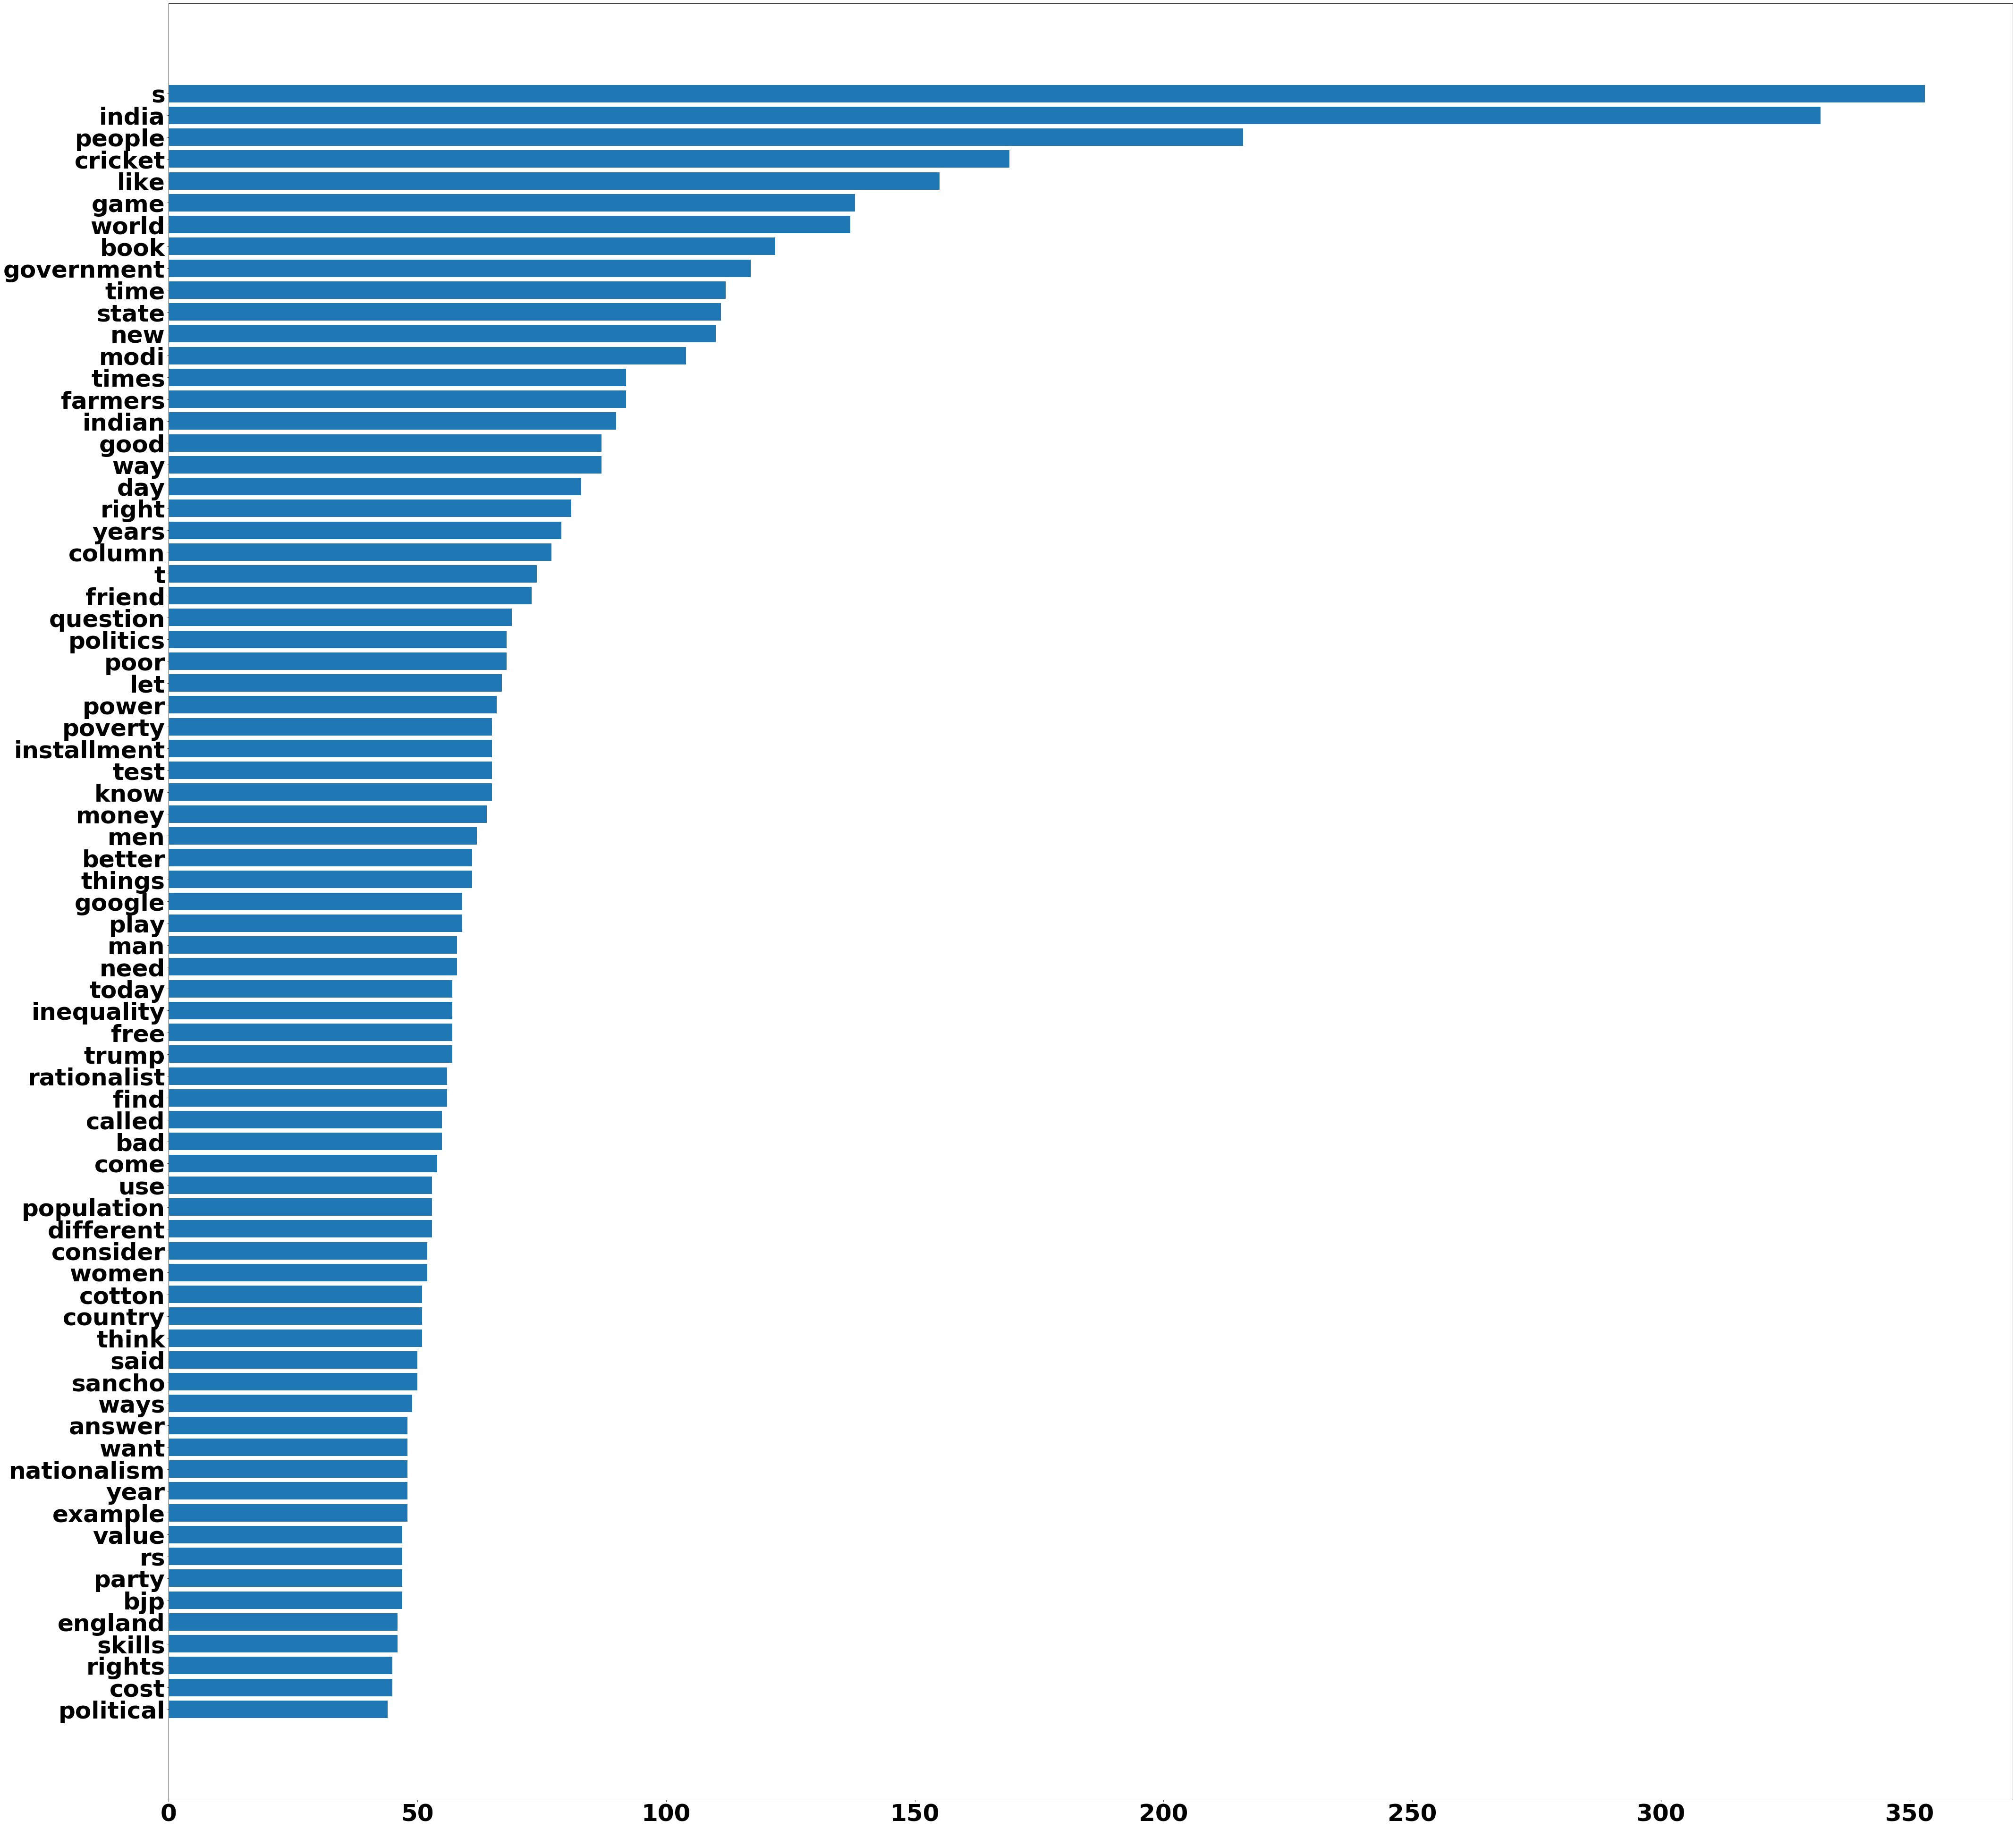

In [39]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

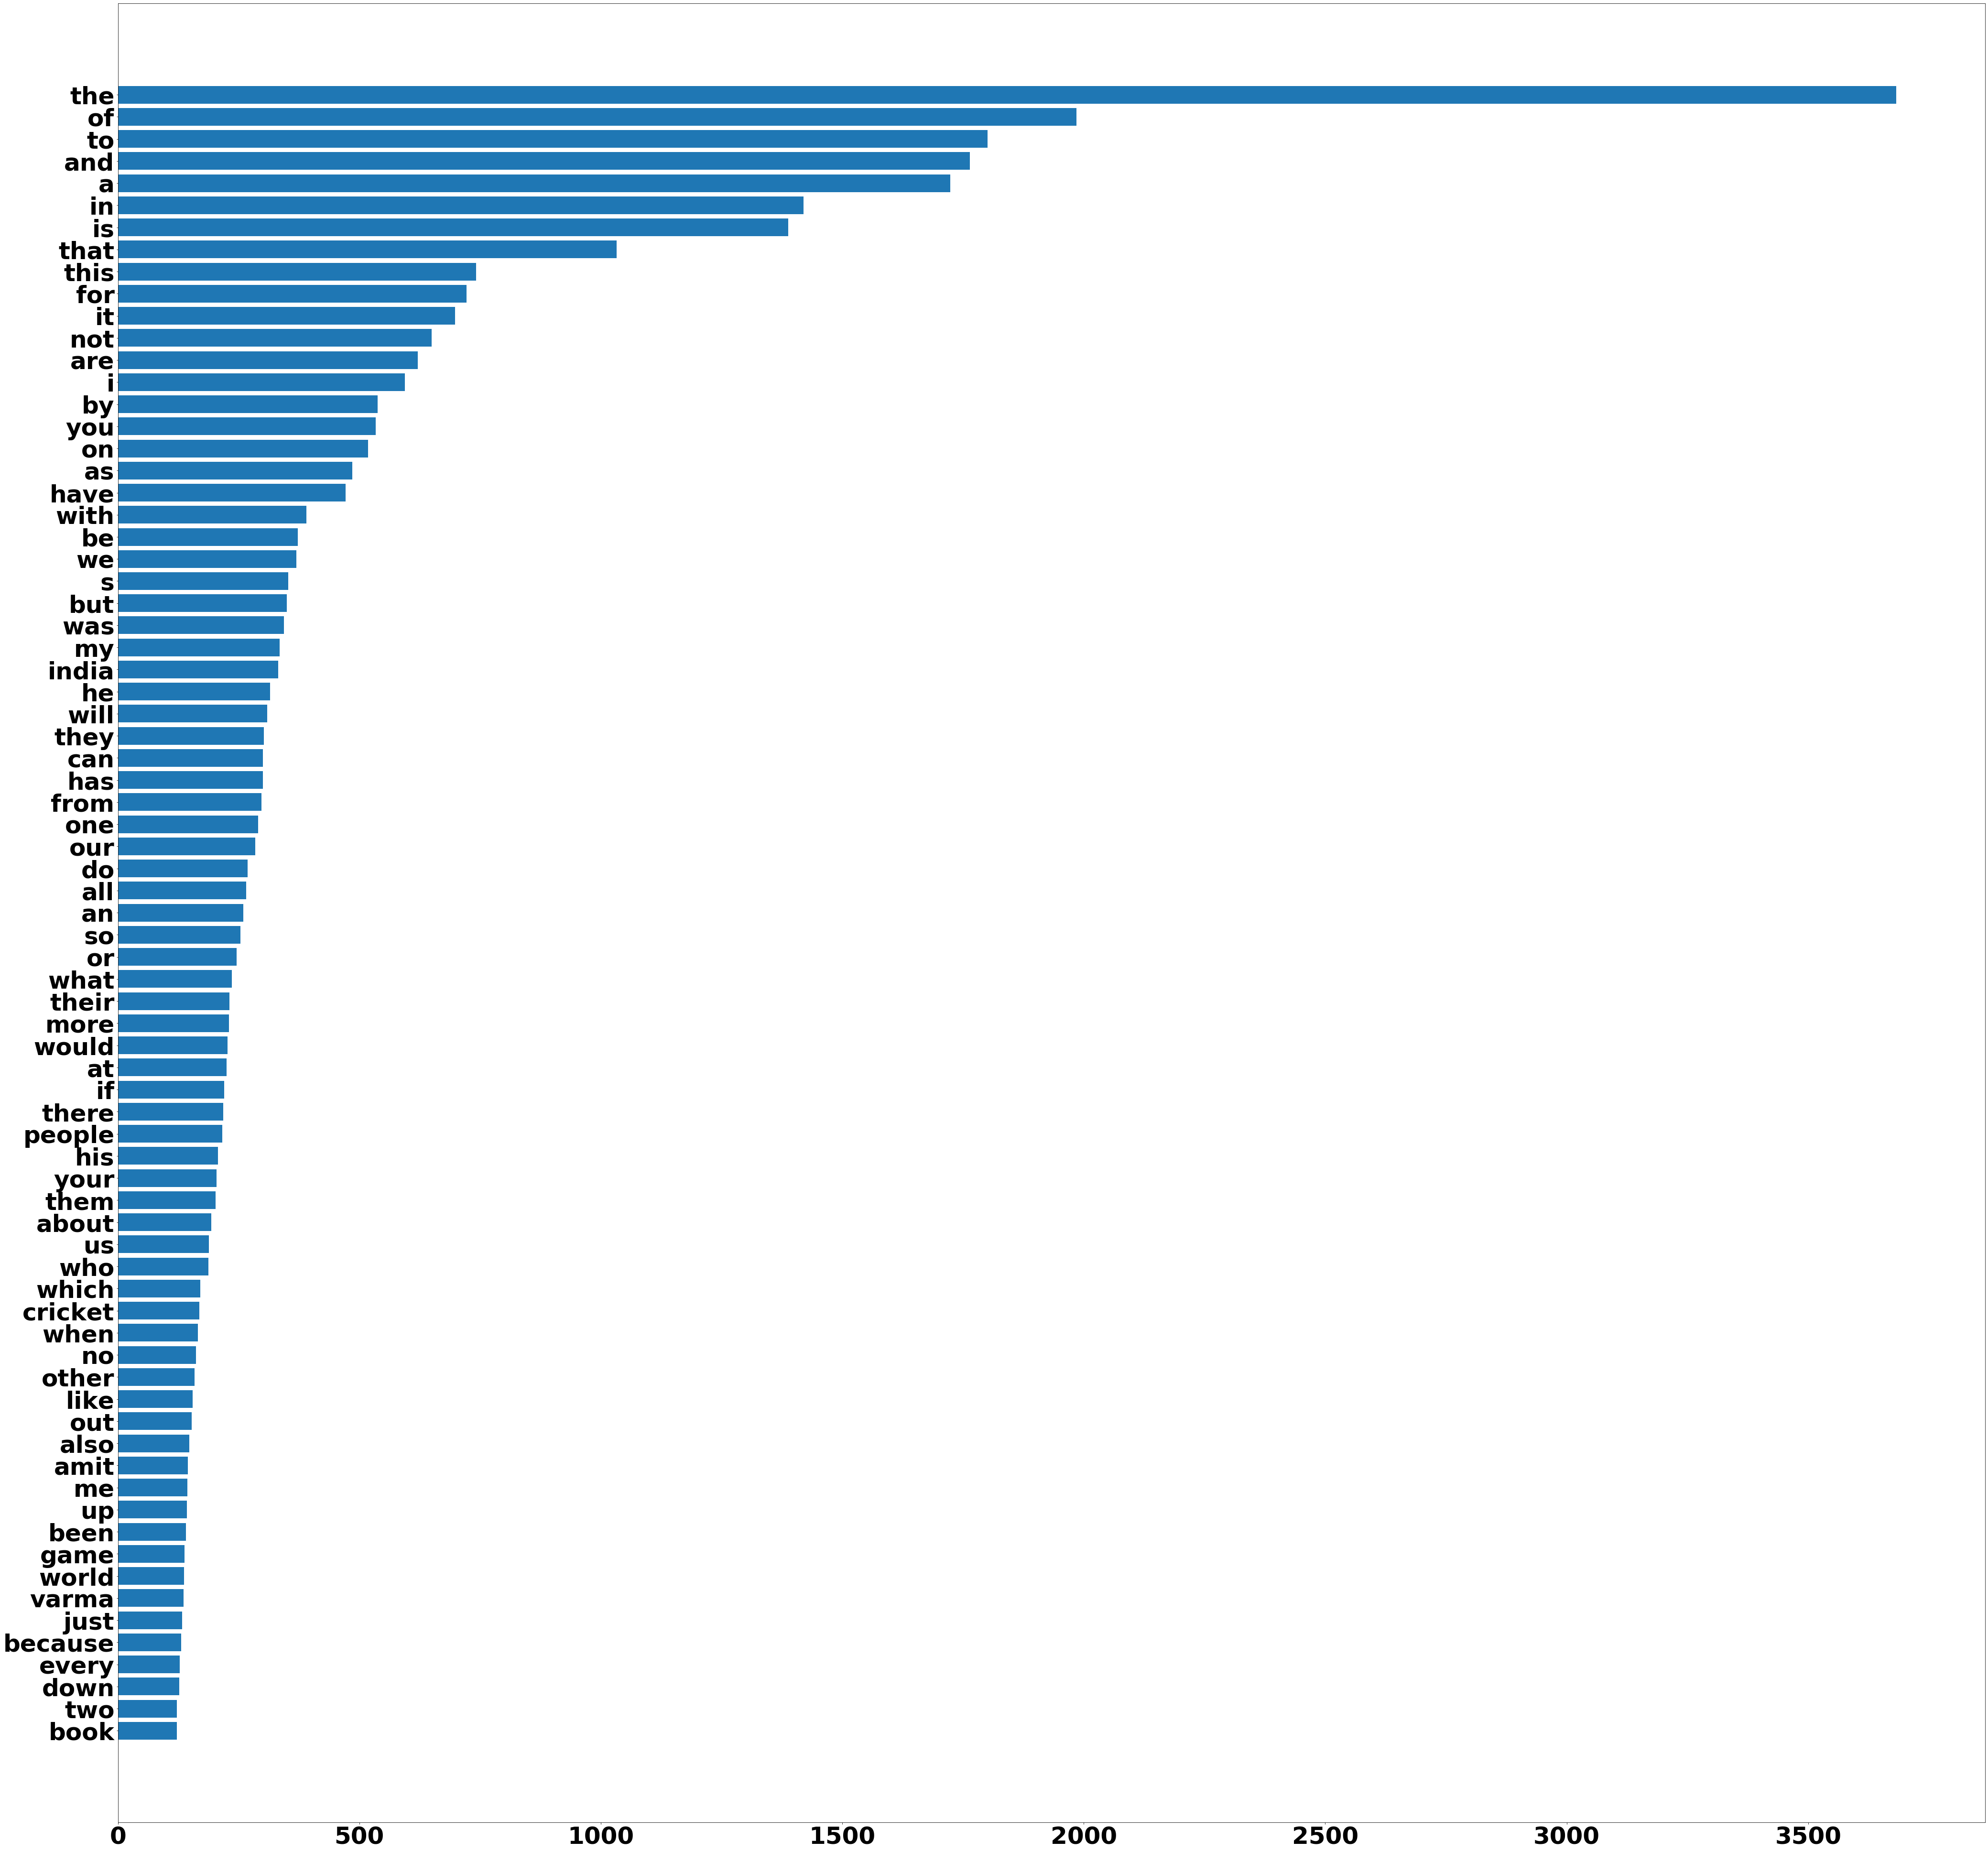

In [40]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

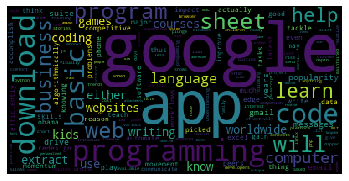

In [41]:
wordcloud = WordCloud().generate(data['text'][1])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

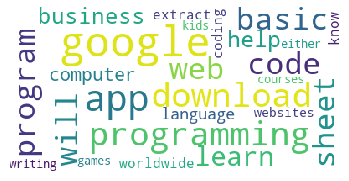

In [42]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['text'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [43]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]
data['clean_text_lemmatized'][0]

'useful website internet smarter increase productivity help learn new skill incredibly useful website solve problem cool url easy memorize save trip google know useful website miss list let know send send personalized email multiple people google sheet download gmail message attachment google drive extract email address gmail message save google sheet receive file size google drive track price favorite amazon item google sheet create smart twitter bot write single line code build bespoke solution use capability feature google automate business process drive business productivity deploy big company university worldwide installation download know india google'

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(20, 2500)


In [45]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['able', 'absent', 'absolute', 'absorb', 'absurd']

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


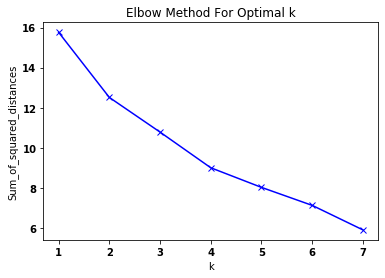

In [47]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [48]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.0040856  0.         0.00220813 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00534569 0.00334014 0.00577833 ... 0.01157179 0.01157179 0.01157179]
 [0.00527775 0.00570489 0.         ... 0.         0.         0.        ]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

In [49]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.0040856  0.         0.00220813 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00534569 0.00334014 0.00577833 ... 0.01157179 0.01157179 0.01157179]
 [0.00527775 0.00570489 0.         ... 0.         0.         0.        ]]
(4, 2500)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [50]:
km.cluster_centers_.argsort()

array([[2499, 1354, 1353, ..., 1921, 1179,  233],
       [   0, 1557, 1556, ..., 1423,  735, 1026],
       [ 321, 2034, 2032, ..., 1179,  949,  500],
       [1249, 1548, 1547, ...,  393,   75, 1810]], dtype=int64)

In [51]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 233, 1179, 1921, ..., 1353, 1354, 2499],
       [1026,  735, 1423, ..., 1556, 1557,    0],
       [ 500,  949, 1179, ..., 2032, 2034,  321],
       [1810,   75,  393, ..., 1547, 1548, 1249]], dtype=int64)

In [52]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['book'],['india'],['sancho'],['friend', 'sancho'],['friend'],['hachette'],

Top words in Cluster-1 :

['google'],['email'],['mac'],['sheet'],['download'],['google', 'sheet'],

Top words in Cluster-2 :

['cricket'],['game'],['india'],['world'],['government'],['people'],

Top words in Cluster-3 :

['question'],['answer'],['clue'],['sample', 'clue'],['sample'],['create'],

In [53]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

,index,Author,title,link,text,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group
0,0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184,use websit internet smarter increas product he...,useful website internet smarter increase produ...,"[here, are, the, most, use, websit, on, the, i...","[here, be, the, most, useful, website, on, the...",1
1,1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483,learn code movement pick momentum worldwid act...,learn code movement pick momentum worldwide ac...,"[the, learn, to, code, movement, has, pick, up...","[the, learn, to, code, movement, have, pick, u...",1
2,2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184,use magic speech recognit write email document...,use magic speech recognition write email docum...,"[use, the, magic, of, speech, recognit, to, wr...","[use, the, magic, of, speech, recognition, to,...",1
3,3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260,new mac user season veteran look s collect dow...,new mac user season veteran look s collection ...,"[whether, you, are, a, new, mac, user, or, sea...","[whether, -PRON-, be, a, new, mac, user, or, s...",1
4,4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896,easier sell music worldwid audienc musician ch...,easy sell music worldwide audience musician ch...,"[it, is, now, easier, than, ever, befor, to, s...","[-PRON-, be, now, easy, than, ever, before, to...",1
5,5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,mail merge for gmail lets you easily send pers...,615,mail merg gmail let easili send person messag ...,mail merge gmail let easily send personalized ...,"[mail, merg, for, gmail, let, you, easili, sen...","[mail, merge, for, gmail, let, -PRON-, easily,...",1


In [54]:
data.keys()

dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [55]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

1    7
2    5
3    4
0    4
Name: cluster_group, dtype: int64

## Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [56]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [57]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [58]:
## Fetch entire tokenized text for specific group
grouped_text.get_group(0)

12    [recommend, jai, arjun, singh, kitabkhana, ama...
13    [book, friend, sancho, publish, go, big, selli...
14    [novel, friend, sancho, stand, india, contempo...
15    [category, date, novel, friend, sancho, stand,...
Name: tokenized_text, dtype: object

In [59]:
from itertools import chain
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
frequent_words_df.head()

,values,cluster_id,counts
0,"[book, india, s, friend, sancho, write, novel,...",0,"[80, 58, 46, 42, 39, 37, 31, 30, 27, 25, 24, 2..."
1,"[google, wireless, network, router, address, e...",1,"[57, 36, 35, 33, 33, 32, 28, 22, 20, 20, 20, 1..."
2,"[india, s, people, cricket, time, game, farmer...",2,"[266, 229, 189, 162, 155, 144, 130, 125, 122, ..."
3,"[s, question, answer, clue, sample, create, bo...",3,"[61, 41, 33, 24, 23, 22, 14, 12, 12, 12, 12, 1..."


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


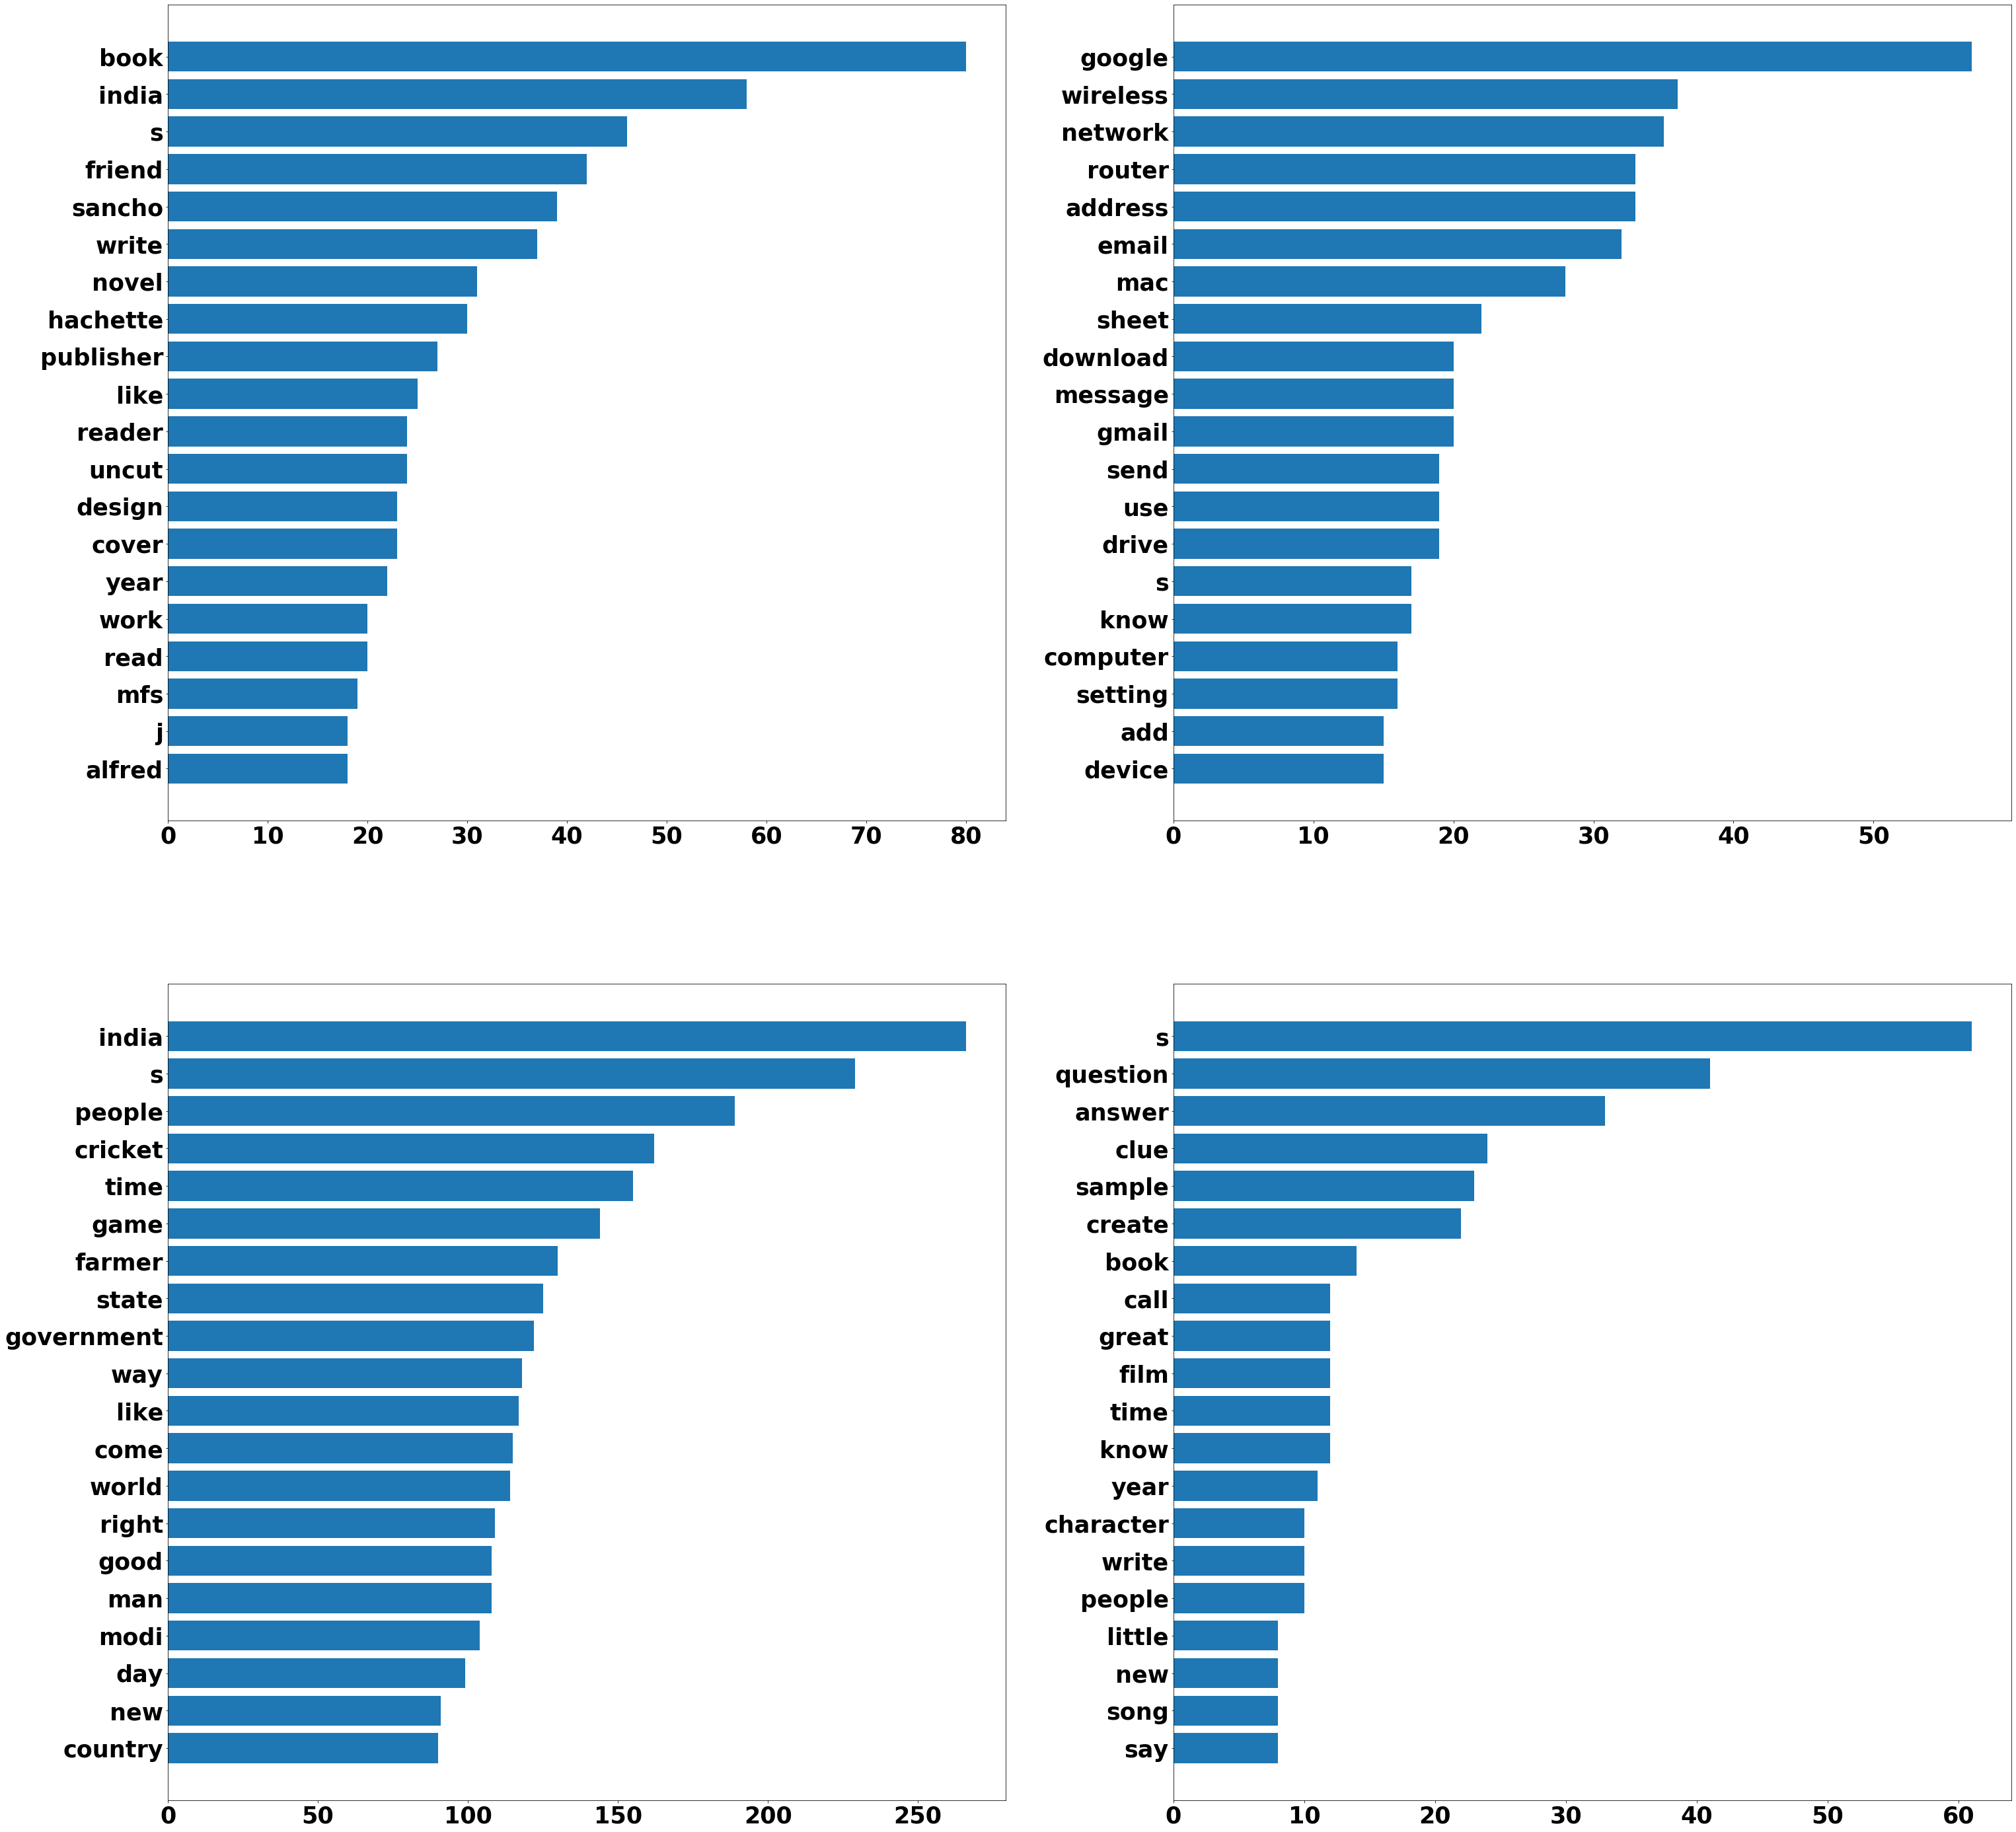

In [60]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

### Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn

<img src="SVD1.png">

In this case, U ∈ ℝ^(m ⨉ t) emerges as our document-topic matrix, and V ∈ ℝ^(n ⨉ t) becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. 

In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

In [61]:
from sklearn.decomposition import TruncatedSVD

n_components = 26

svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=20,
             random_state=143, tol=0.0)

In [62]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"\nTotal Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"\nThe singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [4.26170911e-02 2.27125790e-01 1.16465364e-01 9.48942666e-02
 7.73135628e-02 6.27443096e-02 5.66057517e-02 5.13504489e-02
 4.86718377e-02 4.26497668e-02 3.45386199e-02 3.20402410e-02
 3.00352659e-02 2.63505946e-02 2.31760368e-02 1.47180092e-02
 8.04194769e-03 6.26936637e-03 4.39172942e-03 1.65251462e-61]

Total Explained Variance : 100.0 %

The singular values are [2.16918764e+00 1.89839111e+00 1.36431161e+00 1.26071963e+00
 1.10505525e+00 9.94665017e-01 9.71329171e-01 9.00365569e-01
 8.76592761e-01 8.20810039e-01 7.38488723e-01 7.10895667e-01
 6.88225890e-01 6.44595237e-01 6.05158751e-01 4.81806085e-01
 3.56099656e-01 3.14454718e-01 2.63151715e-01 1.61420836e-30]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [63]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.0076022  0.00423974 0.00570249 ... 0.00763429 0.00763429 0.00763429] and shape is (2500,)
Topic 0: 
google -- 0.1820588739068591
india -- 0.17672564473285887
cricket -- 0.1544406280599324
game -- 0.14180484674332272
people -- 0.13045907556332653
book -- 0.1288222773374524
 
The component is [-0.00479278 -0.00274057 -0.00368022 ... -0.00630829 -0.00630829
 -0.00630829] and shape is (2500,)
Topic 1: 
google -- 0.32874755968579317
sheet -- 0.15507488537674052
email -- 0.14479521085667746
download -- 0.1421462065041581
google sheet -- 0.1302867715318647
gmail -- 0.12165694492978466
 
The component is [ 0.00479921 -0.00031058  0.00240387 ... -0.0110485  -0.0110485
 -0.0110485 ] and shape is (2500,)
Topic 2: 
book -- 0.2551908016342869
sancho -- 0.2518196676272059
friend sancho -- 0.22919484216704417
friend -- 0.22237070020553926
hachette -- 0.19940640989387595
india -- 0.15588245067865675
 
The component is [ 0.00177691  0.00373063 -0.00508525 ... -0.00476356 -0.00476356

### Tagging each document with a topic

In [64]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print("\nDoc Topic Matrix: \n",doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print("\nSVD Categories: \n",svd_categories)


Doc Topic Matrix: 
 [[ 4.79238335e-01  7.87769571e-01 -3.48705674e-02  7.44423776e-03
   1.03255908e-01 -1.20527215e-01 -4.77955838e-02 -9.42660340e-02
  -1.97519224e-02 -3.02919457e-03 -1.04900001e-01 -1.24155686e-02
   4.29313445e-02 -8.08864507e-02  2.27968819e-02 -1.98144054e-01
   3.12113644e-03  2.28645664e-01 -1.03304902e-02  5.42101086e-19]
 [ 5.08223421e-01  6.90470793e-01 -3.31919901e-02 -2.20423666e-02
   6.26740030e-02 -7.74328112e-02 -5.63501544e-02 -4.51811997e-02
  -1.36406550e-02  2.57372528e-02 -1.26261457e-01  1.81121304e-02
   7.82110385e-02 -3.23541487e-01  1.12589925e-01  3.27434388e-01
   8.42822180e-04 -2.04869967e-02  2.48527464e-03  5.36002449e-18]
 [ 2.07064168e-01  1.80172666e-01  5.85379361e-03  5.37700740e-02
  -1.67706303e-01  6.89482410e-01  5.60561445e-01 -2.54072435e-01
  -1.63611143e-01 -1.38292816e-02  6.85535424e-02  6.15634009e-02
   3.77058092e-03 -5.91006610e-02 -1.21628699e-02 -1.78862257e-03
   6.17863536e-03  1.40953377e-02 -9.94132112e-03 -2.

In [65]:
data['SVD_group'] = svd_categories
pd.DataFrame(data).head(6)

,index,Author,title,link,text,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group,SVD_group
0,0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184,use websit internet smarter increas product he...,useful website internet smarter increase produ...,"[here, are, the, most, use, websit, on, the, i...","[here, be, the, most, useful, website, on, the...",1,1
1,1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483,learn code movement pick momentum worldwid act...,learn code movement pick momentum worldwide ac...,"[the, learn, to, code, movement, has, pick, up...","[the, learn, to, code, movement, have, pick, u...",1,1
2,2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184,use magic speech recognit write email document...,use magic speech recognition write email docum...,"[use, the, magic, of, speech, recognit, to, wr...","[use, the, magic, of, speech, recognition, to,...",1,5
3,3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260,new mac user season veteran look s collect dow...,new mac user season veteran look s collection ...,"[whether, you, are, a, new, mac, user, or, sea...","[whether, -PRON-, be, a, new, mac, user, or, s...",1,1
4,4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896,easier sell music worldwid audienc musician ch...,easy sell music worldwide audience musician ch...,"[it, is, now, easier, than, ever, befor, to, s...","[-PRON-, be, now, easy, than, ever, before, to...",1,1
5,5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,mail merge for gmail lets you easily send pers...,615,mail merg gmail let easili send person messag ...,mail merge gmail let easily send personalized ...,"[mail, merg, for, gmail, let, you, easili, sen...","[mail, merge, for, gmail, let, -PRON-, easily,...",1,1


#### Clustering the Document-Topic matrix

In [66]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

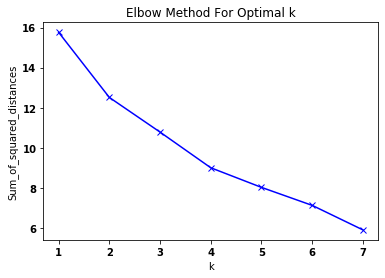

In [67]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 3.32843470e-01 -1.77392331e-01 -7.29661517e-02  5.55486281e-01
  -1.22710171e-01 -2.05181354e-02 -3.99539048e-02  2.64876799e-03
   1.87686317e-02  3.91083194e-03 -1.99603819e-03 -2.01040024e-02
   2.05674058e-02 -2.30381529e-02 -2.92491540e-02 -3.68563559e-03
   6.79661724e-03 -3.77783460e-04  1.86310720e-03 -1.11723646e-17]
 [ 4.24616694e-01  5.69347476e-01 -1.21988348e-02  5.64089572e-03
  -7.12756699e-03  8.16000811e-02  6.72854961e-02  1.86276506e-02
   2.25079388e-03  5.32497148e-03  2.31299565e-02  1.29375929e-02
  -7.21050144e-03  8.21868618e-03 -8.61524232e-03  1.08183152e-02
   1.97822441e-03  3.33532446e-03 -8.85714815e-04 -1.68641840e-17]
 [ 5.98536254e-01 -3.40677760e-01 -1.52336958e-01 -1.78280959e-01
   3.77031248e-03 -9.97308284e-02  1.12573269e-01 -1.47014227e-03
   5.63266559e-03 -2.60135270e-02 -1.34151335e-02  1.59444694e-02
   4.44582061e-03  1.38420459e-03 -1.10808744e-02 -3.33423144e-03
  -2.14163848e-03 -5.00033598e-06 -1.11465941e-03 

['doc_topic_cluster_best_K.pkl']

In [69]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [70]:
doc_cluster_df = pd.DataFrame(data)
doc_cluster_df['doc_topic_cluster_group'].value_counts()

1    7
2    6
0    4
3    3
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [71]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [72]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [73]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [74]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [75]:
frequent_words_df.head()

,values,cluster_id,counts
0,"[s, question, answer, clue, sample, create, bo...",0,"[61, 41, 33, 24, 23, 22, 14, 12, 12, 12, 12, 1..."
1,"[google, wireless, network, router, address, e...",1,"[57, 36, 35, 33, 33, 32, 28, 22, 20, 20, 20, 1..."
2,"[india, s, people, cricket, time, game, farmer...",2,"[278, 245, 189, 162, 155, 144, 130, 125, 122, ..."
3,"[book, india, friend, sancho, write, novel, s,...",3,"[80, 46, 42, 39, 37, 31, 30, 30, 27, 25, 24, 2..."


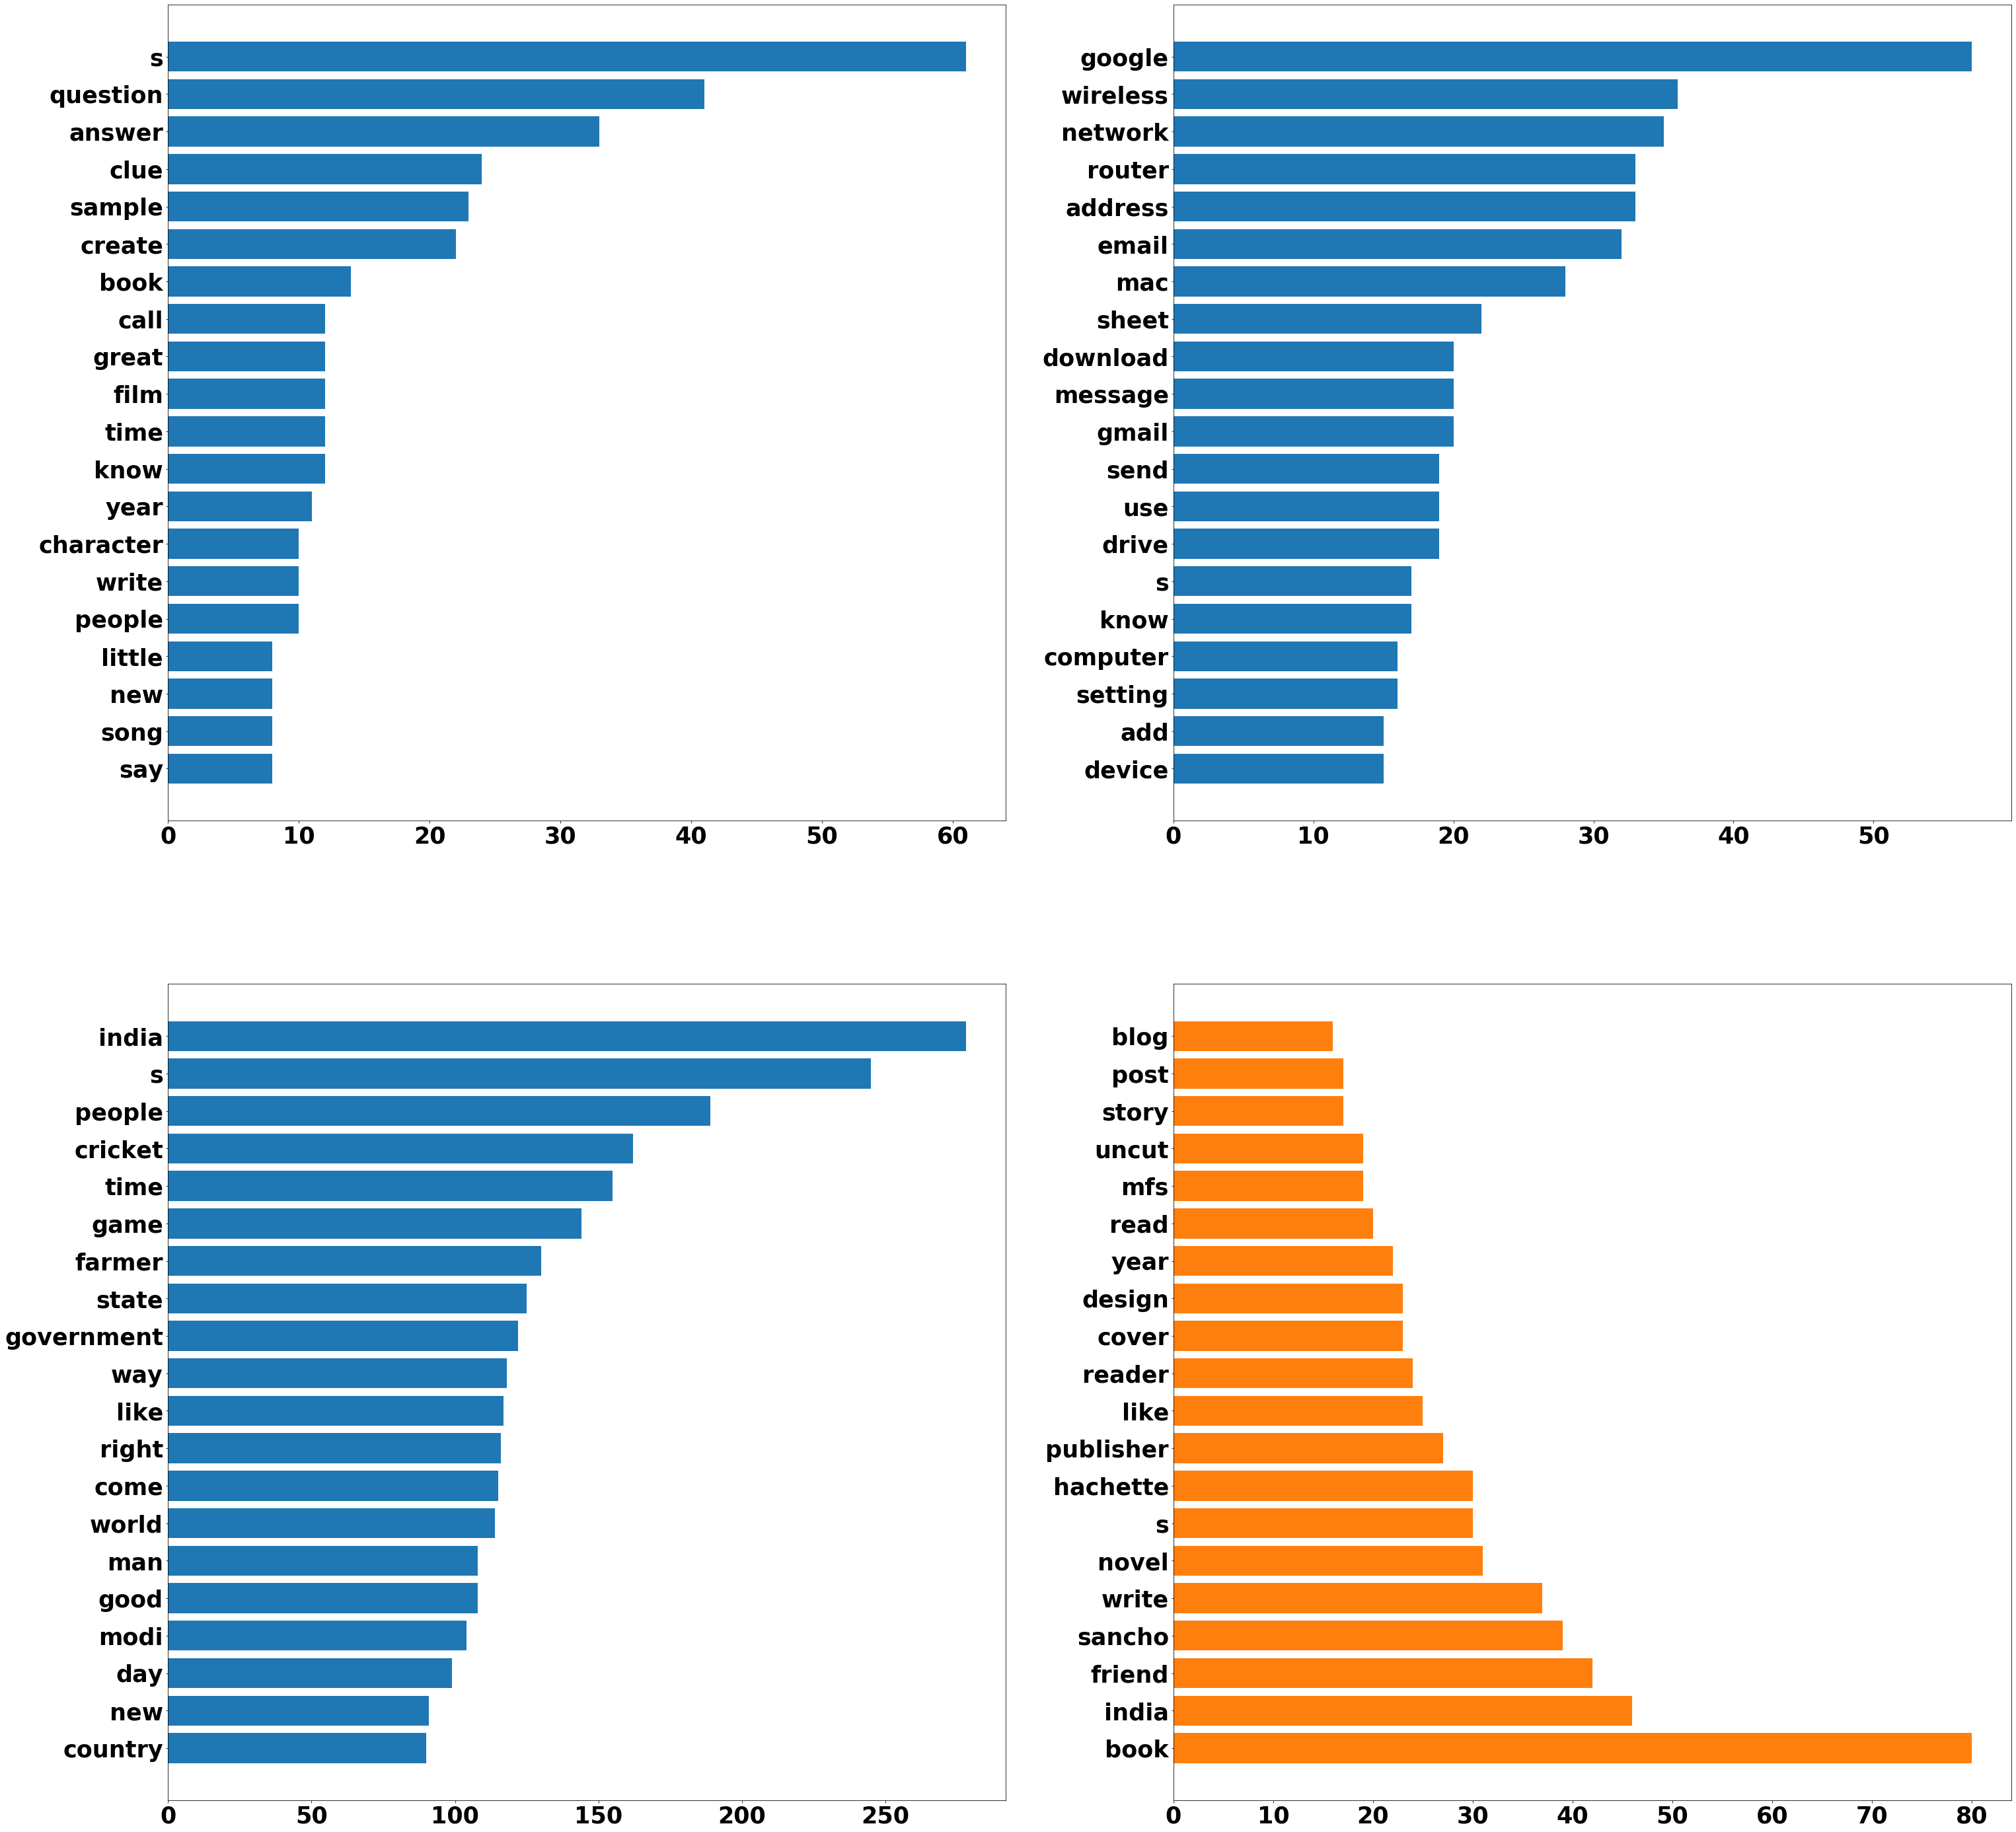

In [76]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()
plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

## Observations

We can notice that with document topic matrix (with just 26 components) we were able to achieve similar results when compared to tfidf matrix. 